In [1]:
#In this Notebook, data from the 2022/2023 NBA Season was scaped from basketball-reference.com.  We will comepare the league average in 8 performance catagories.
#Catagories: FG%, FT%, 3P%, PPG, RPG, APG, SPG, BPG. 
#These are the Field Goal%, Free Throw %, 3 Point %, as well as Points, Rebounds, Assists, Steals, Blocks, per game. 
#As the data is in totals for the season, we will create new columns to see performance per game. 
#Finally we will plot the data points to see how the MVP performed compared to the average league player.

#Importing needed libaries
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [2]:
#URL to be scraped for data from 2022/2023 NBA Season stats
url = 'https://www.basketball-reference.com/leagues/NBA_2023_totals.html'
#Check response
response= requests.get(url)
response

<Response [200]>

In [3]:
#Check reponse content
html = response.content 

soup = BeautifulSoup(html,'html.parser') 
soup.head.text

'\n\n\n\n\n\n\n\n2022-23 NBA Player Stats: Totals | Basketball-Reference.com\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'

In [4]:
#Collect table data and form a data frame

dfs= pd.read_html(response.text)

df=dfs[0]
#Check df.head()
df.head()

C:\Users\Elliott Lam\AppData\Local\Temp\ipykernel_34900\3100823082.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs= pd.read_html(response.text)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,.702,100,228,328,50,31,30,59,102,508
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,.364,214,271,485,97,36,46,79,98,361
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,.806,184,504,688,240,88,61,187,208,1529
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,.812,43,78,121,67,16,15,41,99,467
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,.750,85,286,371,97,45,48,60,143,696


In [8]:
#Check df.tail()
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
700,535,Thaddeus Young,PF,34,TOR,54,9,795,108,198,...,.692,71,95,166,75,54,5,42,88,240
701,536,Trae Young,PG,24,ATL,73,73,2541,597,1390,...,.886,56,161,217,741,80,9,300,104,1914
702,537,Omer Yurtseven,C,24,MIA,9,0,83,16,27,...,.833,8,15,23,2,2,2,4,16,40
703,538,Cody Zeller,C,30,MIA,15,2,217,37,59,...,.686,25,39,64,10,3,4,14,33,98
704,539,Ivica Zubac,C,25,LAC,76,76,2170,326,514,...,.697,236,520,756,77,29,98,117,219,818


In [17]:
#Saving the raw data as csv using utf-8 as the player names contain speical characters
df.to_csv('2022_23_NBA_Stats_Raw.csv', encoding = 'utf-8' )

In [5]:
#Check df.describe 
df.describe()

#No statistic results returned

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,705,705,705,705,705,705,705,705,705,705,...,668,705,705,705,705,705,705,705,705,705
unique,540,540,12,23,32,84,81,571,332,460,...,264,150,295,333,262,104,91,183,215,486
top,Rk,Player,SG,23,TOT,G,0,MP,FG,FGA,...,1.000,0,DRB,TRB,AST,0,0,0,PF,PTS
freq,26,26,162,84,70,26,172,26,26,26,...,38,32,26,26,26,32,67,29,26,26


In [6]:
#Check df.info to see data types
df.info()

#all data is object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      705 non-null    object
 1   Player  705 non-null    object
 2   Pos     705 non-null    object
 3   Age     705 non-null    object
 4   Tm      705 non-null    object
 5   G       705 non-null    object
 6   GS      705 non-null    object
 7   MP      705 non-null    object
 8   FG      705 non-null    object
 9   FGA     705 non-null    object
 10  FG%     702 non-null    object
 11  3P      705 non-null    object
 12  3PA     705 non-null    object
 13  3P%     681 non-null    object
 14  2P      705 non-null    object
 15  2PA     705 non-null    object
 16  2P%     698 non-null    object
 17  eFG%    702 non-null    object
 18  FT      705 non-null    object
 19  FTA     705 non-null    object
 20  FT%     668 non-null    object
 21  ORB     705 non-null    object
 22  DRB     705 non-null    ob

In [9]:
#Upon checking more rows, and the original data, we can see that around every 25 rows, there is a new title row. This needs to be dropped.
df.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,.702,100,228,328,50,31,30,59,102,508
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,.364,214,271,485,97,36,46,79,98,361
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,.806,184,504,688,240,88,61,187,208,1529
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,.812,43,78,121,67,16,15,41,99,467
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,.750,85,286,371,97,45,48,60,143,696
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,884,131,295,...,.667,15,86,101,108,32,21,55,88,363
6,6,Nickeil Alexander-Walker,SG,24,UTA,36,3,528,83,170,...,.692,8,51,59,76,24,14,45,58,228
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,356,48,125,...,.619,7,35,42,32,8,7,10,30,135
8,7,Grayson Allen,SG,27,MIL,72,70,1972,245,557,...,.905,61,176,237,163,62,14,72,117,750
9,8,Jarrett Allen,C,24,CLE,68,68,2220,403,626,...,.733,221,445,666,113,54,84,93,153,969


In [11]:
#Begin to clean the data 
#Drop all rows contining RK in Column Rk
df = df[df['Rk'] != 'Rk']
df.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,.702,100,228,328,50,31,30,59,102,508
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,.364,214,271,485,97,36,46,79,98,361
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,.806,184,504,688,240,88,61,187,208,1529
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,.812,43,78,121,67,16,15,41,99,467
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,.750,85,286,371,97,45,48,60,143,696
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,884,131,295,...,.667,15,86,101,108,32,21,55,88,363
6,6,Nickeil Alexander-Walker,SG,24,UTA,36,3,528,83,170,...,.692,8,51,59,76,24,14,45,58,228
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,356,48,125,...,.619,7,35,42,32,8,7,10,30,135
8,7,Grayson Allen,SG,27,MIL,72,70,1972,245,557,...,.905,61,176,237,163,62,14,72,117,750
9,8,Jarrett Allen,C,24,CLE,68,68,2220,403,626,...,.733,221,445,666,113,54,84,93,153,969


In [15]:
#Drop column Rk as unneeded. 
df.drop(columns = 'Rk', inplace = True)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,.485,...,.702,100,228,328,50,31,30,59,102,508
1,Steven Adams,C,29,MEM,42,42,1133,157,263,.597,...,.364,214,271,485,97,36,46,79,98,361
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,.540,...,.806,184,504,688,240,88,61,187,208,1529
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,.427,...,.812,43,78,121,67,16,15,41,99,467
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,.470,...,.750,85,286,371,97,45,48,60,143,696


In [7]:
#Check for nulls
df.isnull().sum()

#Upon looking through the data, the null values are from players that did not have a shot attempt in that category.  
#Instead of filling this data, we will get the mean minus the 0 values. 

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        3
3P         0
3PA        0
3P%       24
2P         0
2PA        0
2P%        7
eFG%       3
FT         0
FTA        0
FT%       37
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [22]:
#Creating a save point for the cleaned data.  
#Reopen the csv as now that the we have dropped the title rows containing 'Rk' the remaining data should be recongnized as numbers
df.to_csv('2022_23_NBA_Stats_Cleaned.csv', encoding = 'utf-8', index = False )
nba_df = pd.read_csv('2022_23_NBA_Stats_Cleaned.csv')
nba_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,0.702,100,228,328,50,31,30,59,102,508
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,0.364,214,271,485,97,36,46,79,98,361
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,0.806,184,504,688,240,88,61,187,208,1529
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,0.812,43,78,121,67,16,15,41,99,467
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,0.750,85,286,371,97,45,48,60,143,696


In [23]:
#Recheck data types. Numbers are showing as int and float.  We can begin calculations.
nba_df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
eFG%      float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [24]:
#Creating per game calulations and new columns
nba_df['PPG'] = nba_df['PTS']/nba_df['G']
nba_df['RPG'] = nba_df['TRB']/nba_df['G']
nba_df['APG'] = nba_df['AST']/nba_df['G']
nba_df['SPG'] = nba_df['STL']/nba_df['G']
nba_df['BPG'] = nba_df['BLK']/nba_df['G']
nba_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,PPG,RPG,APG,SPG,BPG
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,31,30,59,102,508,9.236364,5.963636,0.909091,0.563636,0.545455
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,36,46,79,98,361,8.595238,11.547619,2.309524,0.857143,1.095238
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,88,61,187,208,1529,20.386667,9.173333,3.200000,1.173333,0.813333
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,16,15,41,99,467,7.915254,2.050847,1.135593,0.271186,0.254237
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,45,48,60,143,696,9.038961,4.818182,1.259740,0.584416,0.623377


In [26]:
#Creating another save point
nba_df.to_csv('2022_23_NBA_Stats_PerGame.csv', encoding = 'utf-8', index = False )

In [27]:
#Work off the latest iteration of saved data
nba_df = pd.read_csv('2022_23_NBA_Stats_PerGame.csv')
nba_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,PPG,RPG,APG,SPG,BPG
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,31,30,59,102,508,9.236364,5.963636,0.909091,0.563636,0.545455
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,36,46,79,98,361,8.595238,11.547619,2.309524,0.857143,1.095238
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,88,61,187,208,1529,20.386667,9.173333,3.200000,1.173333,0.813333
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,16,15,41,99,467,7.915254,2.050847,1.135593,0.271186,0.254237
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,45,48,60,143,696,9.038961,4.818182,1.259740,0.584416,0.623377


In [31]:
#Calulating league means.  for FT$, FG% and 3P%, we will calculate the mean less the 0 values.

ftp_mean = nba_df[nba_df['FT%']!= 0]['FT%'].mean()
fgp_mean = nba_df[nba_df['FG%'] !=0 ]['FG%'].mean()
tpp_mean = nba_df[nba_df['3P%']!= 0]['3P%'].mean()
ppg_mean = nba_df['PPG'].mean()
rpg_mean = nba_df['RPG'].mean()
apg_mean = nba_df['APG'].mean()
spg_mean = nba_df['SPG'].mean()
bpg_mean = nba_df['BPG'].mean()

print('ftp_mean:', ftp_mean)
print('fgp_mean:', fgp_mean)
print('tpp_mean:', tpp_mean)
print('ppg_mean:', ppg_mean)
print('rpg_mean:', rpg_mean)
print('apg_mean:', apg_mean)
print('spg_mean:', spg_mean)
print('bpg_mean:', bpg_mean)

ftp_mean: 0.7584929356357927
fgp_mean: 0.4683985074626866
tpp_mean: 0.3506785714285714
ppg_mean: 8.856125971780996
rpg_mean: 3.4594888454452524
apg_mean: 2.009988169974759
spg_mean: 0.5997246236305579
bpg_mean: 0.36871326778455565


In [32]:
#Create leauge_means_df

league_mean_df = pd.DataFrame({
    'FT%': [ftp_mean],
    'FG%': [fgp_mean],
    '3P%': [tpp_mean],
    'PPG': [ppg_mean],
    'RPG': [rpg_mean],
    'APG': [apg_mean],
    'SPG': [spg_mean],
    'BPG': [bpg_mean]
})
league_mean_df.head()

,FT%,FG%,3P%,PPG,RPG,APG,SPG,BPG
0,0.758493,0.468399,0.350679,8.856126,3.459489,2.009988,0.599725,0.368713


In [34]:
#Finding MVP values. MVP = Joel Embiid

mvp_ftp = nba_df.loc[nba_df['Player'] == 'Joel Embiid', 'FT%'].values[0]
mvp_fgp = nba_df.loc[nba_df['Player'] == 'Joel Embiid', 'FG%'].values[0]
mvp_tpp = nba_df.loc[nba_df['Player'] == 'Joel Embiid', '3P%'].values[0]
mvp_ppg = nba_df.loc[nba_df['Player'] == 'Joel Embiid', 'PPG'].values[0]
mvp_rpg = nba_df.loc[nba_df['Player'] == 'Joel Embiid','RPG'].values[0]
mvp_apg = nba_df.loc[nba_df['Player'] == 'Joel Embiid', 'APG'].values[0]
mvp_spg = nba_df.loc[nba_df['Player'] == 'Joel Embiid', 'SPG'].values[0]
mvp_bpg = nba_df.loc[nba_df['Player'] == 'Joel Embiid', 'BPG'].values[0]

print('mvp_ftp:', mvp_ftp)
print('mvp_fgp:', mvp_fgp)
print('mvp_tpp:', mvp_tpp)
print('mvp_ppg:', mvp_ppg)
print('mvp_rpg:', mvp_rpg)
print('mvp_apg:', mvp_apg)
print('mvp_spg:', mvp_spg)
print('mvp_bpg:', mvp_bpg)

mvp_ftp: 0.857
mvp_fgp: 0.548
mvp_tpp: 0.33
mvp_ppg: 33.07575757575758
mvp_rpg: 10.151515151515152
mvp_apg: 4.151515151515151
mvp_spg: 1.0
mvp_bpg: 1.696969696969697


In [41]:
#Creating a DF for MVP stats

mvp_df = pd.DataFrame({
    'FT%': [mvp_ftp],
    'FG%': [mvp_fgp],
    '3P%': [mvp_tpp],
    'PPG': [mvp_ppg],
    'RPG': [mvp_rpg],
    'APG': [mvp_apg],
    'SPG': [mvp_spg],
    'BPG': [mvp_bpg]
}) 
mvp_df.head()

,FT%,FG%,3P%,PPG,RPG,APG,SPG,BPG
0,0.857,0.548,0.33,33.075758,10.151515,4.151515,1.0,1.69697


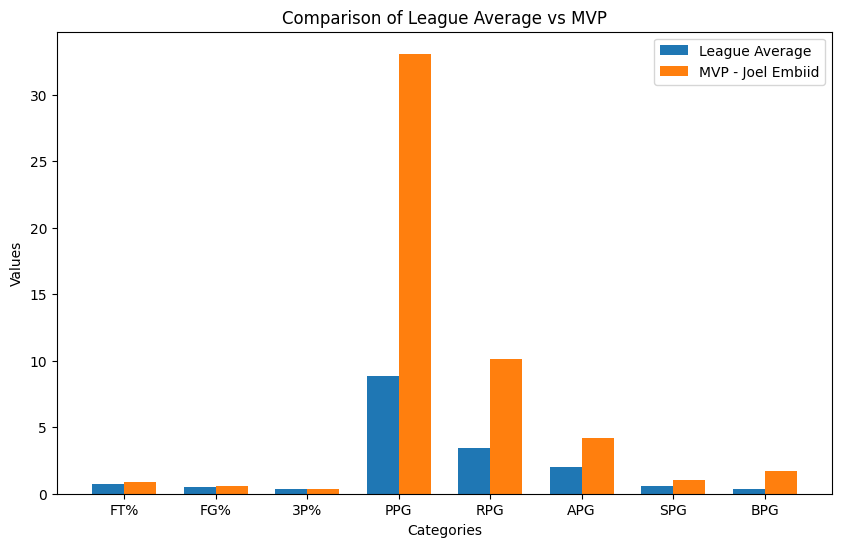

In [46]:
#Plotting the data using matplotlib
#Get the column names
column_names = league_mean_df.columns

#Get the data values from the DataFrames
league_mean = league_mean_df.values.squeeze()
mvp = mvp_df.values.squeeze()

#Set the figure size
plt.figure(figsize=(10, 6))

#Set the bar width
bar_width = 0.35

#Set the x coordinates for the bars
index = range(len(column_names))

#Create the bar plot for league mean
plt.bar(index, league_mean, bar_width, label='League Average')

#Create the bar plot for Joel Embiid
plt.bar([i + bar_width for i in index], mvp, bar_width, label='MVP - Joel Embiid')

#Set the x-axis tick labels
plt.xticks([i + bar_width/2 for i in index], column_names)

#Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of League Average vs MVP')

#Add legend
plt.legend()
#Save plot
plt.savefig('League Average vs MVP.jpg')
#Show plot
plt.show()


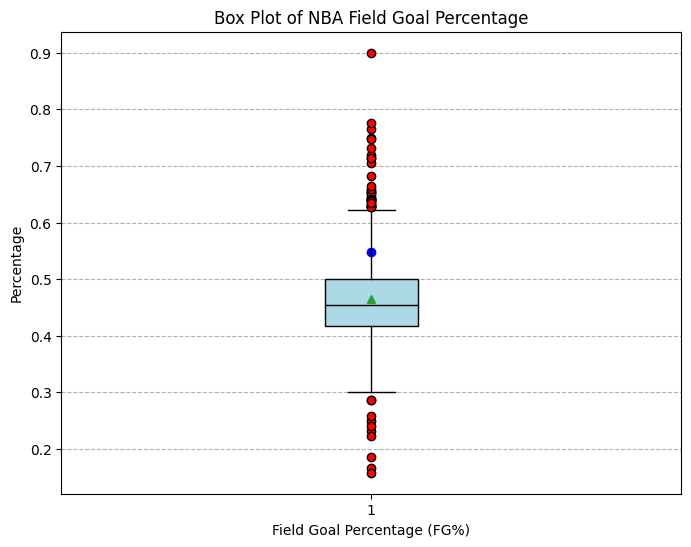

In [40]:
#We can also use a box plot for each category to see how the MVP performed compared to the rest of the leauge.
#Box plot for FG%

#Since we have nan values, we must take care of these before we can plot.  As those players that did not attempt a shot can be considered 
#fringe cases and are a small portion of the data, we can drop them.

nba_df.dropna(inplace=True)

#Extract the FG% data from the nba_df
fgp_data = nba_df['FG%']

#Set the figure size
plt.figure(figsize=(8, 6))

#Create the box plot with color and gridlines
plt.boxplot(fgp_data, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6),
            medianprops=dict(color='black'), showmeans=True)

#Show Joel Embiid's FG% in blue
plt.scatter(1, mvp_df['FG%'], color='blue', label='Joel Embiid')

#Add labels and title
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Percentage')
plt.title('Box Plot of NBA Field Goal Percentage')

#Add gridlines
plt.grid(True, axis='y', linestyle='--')

plt.show()

#However, we can see that for this comparison to be meaningful, 
#we will need to adjust for outliers by taking into account min games played, min FGA, min minutes played.
#We can further clean the data and plot for each category to dive into more detail at a later time.  